In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [5]:
# Import Dataset from seaborn
df = sns.load_dataset('tips')
df.columns


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
 df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
 df.isnull().sum() / len(df) * 100 # type: ignore



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
sns.scatterplot(df, x= 'tip', y='total_bill', hue = 'size')

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
sns.boxplot(df, x='tip')

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
# now remobing the outliers of tip column greater than 8
df = df[df['tip'] < 8]

In [15]:
# now checking the boxplot again for total_bill
sns.boxplot(df, x='total_bill')

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

<Axes: xlabel='tip'>

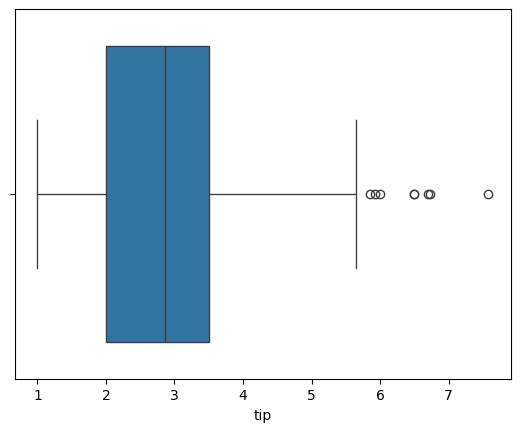

In [16]:
# now remobing the outliers of total_bill column greater than 40

df = df[df['total_bill'] < 40]


<Axes: xlabel='tip', ylabel='Count'>

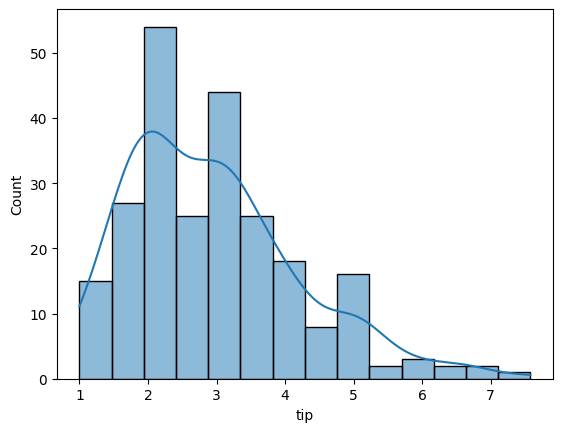

In [17]:
# now checking the normality of the data
sns.histplot(df['tip'], kde=True)

<Axes: xlabel='tip', ylabel='Count'>

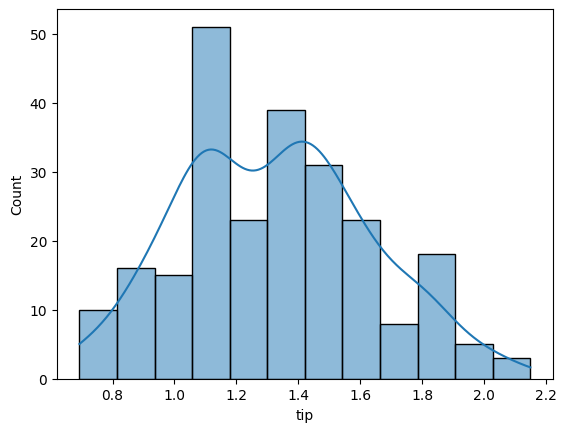

In [18]:
# as we can see the data is not normally distributed so we will apply log transformation to make it normally distributed
df['tip'] = np.log1p(df['tip'])
sns.histplot(df['tip'], kde=True)


<Axes: xlabel='total_bill', ylabel='Count'>

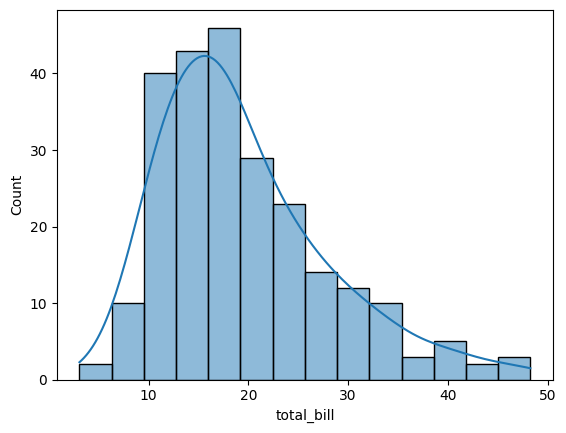

In [19]:
# now checking the normality of the data for total_bill

sns.histplot(df['total_bill'], kde=True)


<Axes: xlabel='tip', ylabel='total_bill'>

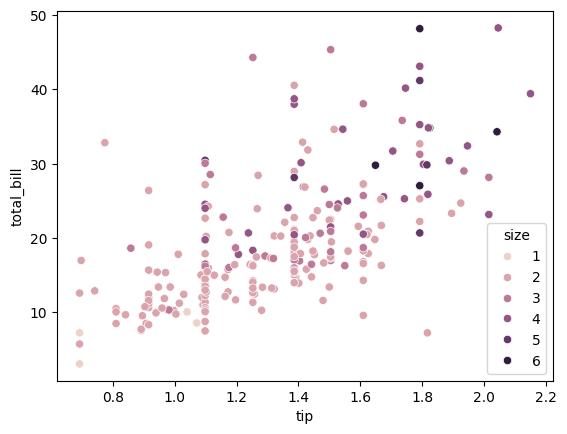

In [20]:
# as we can see the data is not normally distributed so we will apply log transformation to make it normally distributed
df['total_bill'] = np.log1p(df['total_bill'])
sns.histplot(df['total_bill'], kde=True)


In [21]:
# now checking the normality of the data for size

sns.histplot(df['size'], kde=True)

<Axes: xlabel='size', ylabel='Count'>

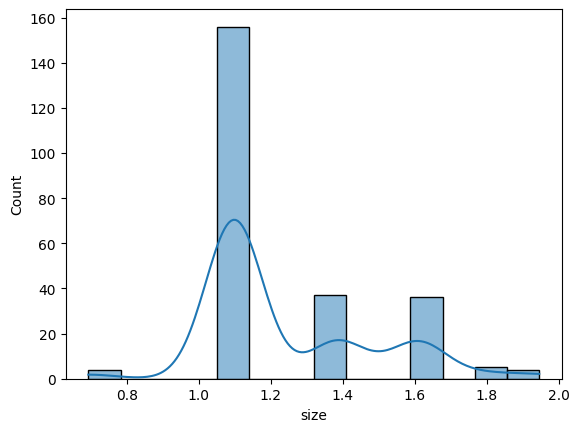

In [22]:
# as we can see the data is not normally distributed so we will apply log transformation to make it normally distributed
df['size'] = np.log1p(df['size'])
sns.histplot(df['size'], kde=True)

In [23]:
from sklearn.preprocessing import LabelEncoder

# now encoding the categorical columns (sex, smoker, day, time)
le = LabelEncoder()

# making the categorical columns to one place and then apply for loop for label encoding
cat_cols = df[['sex', 'smoker', 'day', 'time']] 

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,0.698135,0,0,2,0,1.098612
1,10.34,0.978326,1,0,2,0,1.386294
2,21.01,1.504077,1,0,2,0,1.386294
3,23.68,1.460938,1,0,2,0,1.098612
4,24.59,1.528228,0,0,2,0,1.609438


In [24]:
# now checking the correlation of the data
df.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.629195,0.130770,0.082032,-0.022455,-0.174477,0.610642
tip,0.629195,1.000000,0.063115,-0.001715,0.022003,-0.110811,0.494465
sex,0.130770,0.063115,1.000000,0.001319,-0.073723,-0.202193,0.091861
smoker,0.082032,-0.001715,0.001319,1.000000,-0.283152,-0.053998,-0.132033
day,-0.022455,0.022003,-0.073723,-0.283152,1.000000,0.636608,0.065705
time,-0.174477,-0.110811,-0.202193,-0.053998,0.636608,1.000000,-0.124862
size,0.610642,0.494465,0.091861,-0.132033,0.065705,-0.124862,1.000000


<Axes: >

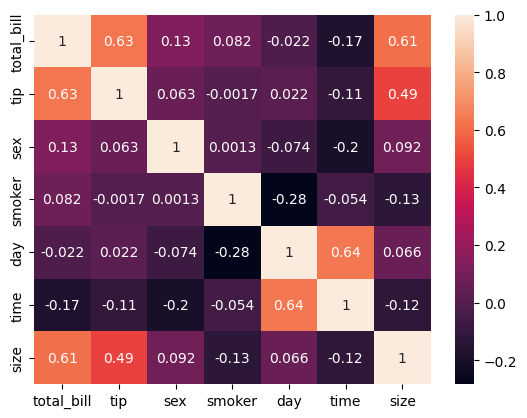

In [25]:
sns.heatmap(df.corr(), annot=True)

In [26]:
# making the dependent and independent variables based on the assumptions of regression model
# following are the assumptions of regression model
# 1. Linearity
# 2. Homoscedasticity
# 3. Multicollinearity
# 4. Auto-correlation
# 5. Normality of residuals

X = df.drop('tip', axis=1)
y = df['tip']

In [27]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [28]:
# Data Preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [30]:
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}")

Linear Regression - MSE: 0.047828196246636694, R^2: 0.5018514125428901


In [ ]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regression - MSE: {mse_dt}, R^2: {r2_dt}")

Decision Tree Regression - MSE: 0.9725204081632653, R^2: 0.22196583798405778


In [ ]:

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression - MSE: {mse_rf}, R^2: {r2_rf}")


Random Forest Regression - MSE: 0.9406103122448991, R^2: 0.24749449993222583


# MODEL PERFORMANCE COMPARISON


In [ ]:
print(f"Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}")
print(f"Decision Tree Regression - MSE: {mse_dt}, R^2: {r2_dt}")
print(f"Random Forest Regression - MSE: {mse_rf}, R^2: {r2_rf}")


Linear Regression - MSE: 0.7033566017436107, R^2: 0.4373018194348247
Decision Tree Regression - MSE: 0.9725204081632653, R^2: 0.22196583798405778
Random Forest Regression - MSE: 0.9406103122448991, R^2: 0.24749449993222583


# MODEL INTERPERATION

total_bill     0.766787
smoker_No      0.067731
size           0.057472
day_Sat        0.027636
sex_Female     0.025727
day_Sun        0.025593
time_Dinner    0.018821
day_Fri        0.010234
dtype: float64


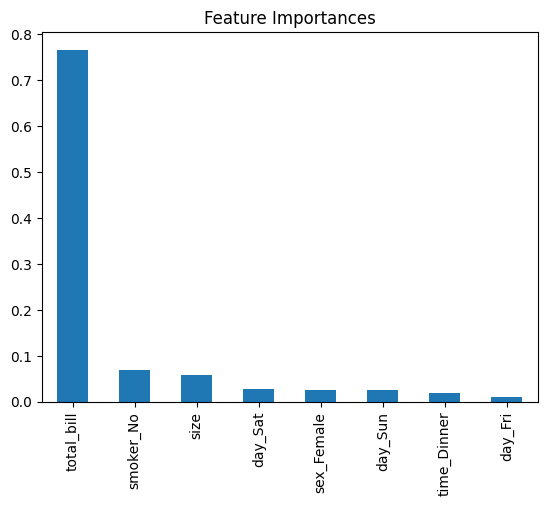

In [ ]:
# Feature importance for Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

# Plot feature importances
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

# HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Evaluate the best estimator on the test data
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Best Random Forest - MSE: {mse_best_rf}, R^2: {r2_best_rf}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
0.35300019673251704
Best Random Forest - MSE: 0.9872883182811446, R^2: 0.21015123905446687


# MODEL VALIDATIOMN

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the best model
cv_scores = cross_val_score(best_rf, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")


Cross-Validation Scores: [0.44863806 0.53220386 0.5594046  0.27568073 0.39167486]
Mean CV Score: 0.4415204229374276


# RESIDUAL ANALYSIS

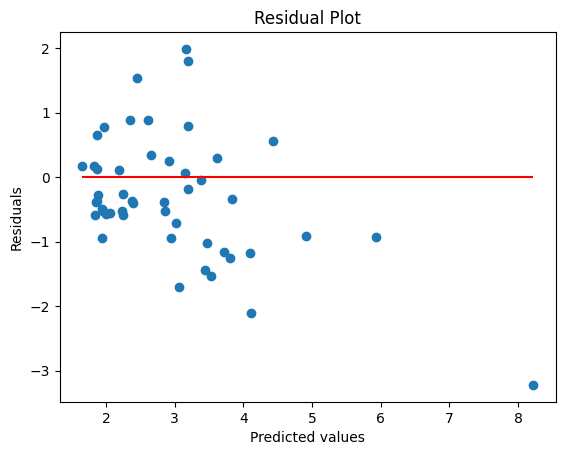

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_best_rf

# Plot residuals
plt.scatter(y_pred_best_rf, residuals)
plt.hlines(y=0, xmin=y_pred_best_rf.min(), xmax=y_pred_best_rf.max(), colors='r')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# MAKE PREDICTION

In [38]:
# Rename the columns in new_data to match the column names used during fit time
new_data = new_data[X.columns]

# Make predictions with the updated new_data
predictions = best_rf.predict(new_data)
print(predictions)

NameError: name 'new_data' is not defined

In [ ]:
import joblib

# Save the model and predictions using joblib
pipeline = # define your pipeline here
joblib.dump(pipeline, 'pipeline_model.joblib')

print("Model and predictions have been loaded successfully.")

['best_rf_model.pkl']